In [2]:
!pip install earthpy
import matplotlib.pyplot as plt

import numpy as np
import earthpy.plot as ep
import seaborn as sns
import earthpy.spatial as es

import plotly.graph_objects as go
import plotly.express as px

from scipy.io import loadmat

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,
                             confusion_matrix, classification_report)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tqdm import tqdm



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 3.2 MB/s eta 0:00:00


In [3]:
data = loadmat('/content/PaviaU.mat')['paviaU']

gt = loadmat('/content/PaviaU_gt.mat')['paviaU_gt']

df = pd.DataFrame(data.reshape(data.shape[0]*data.shape[1], -1))

df.columns = [f'band{i}' for i in range(1, df.shape[-1]+1)]

df['class'] = gt.ravel()

In [4]:
fig = plt.figure(figsize = (20, 12))

ax = fig.subplots(2, 5)

for i in range(2):
  for j in range(5):
    c = np.random.randint(103)
    ax[i][j].imshow(data[:, :, c], cmap='gray')
    ax[i][j].axis('off')
    ax[i][j].title.set_text(f"Band - {c}")
    c+=1

plt.tight_layout()

plt.show()

Output hidden; open in https://colab.research.google.com to view.

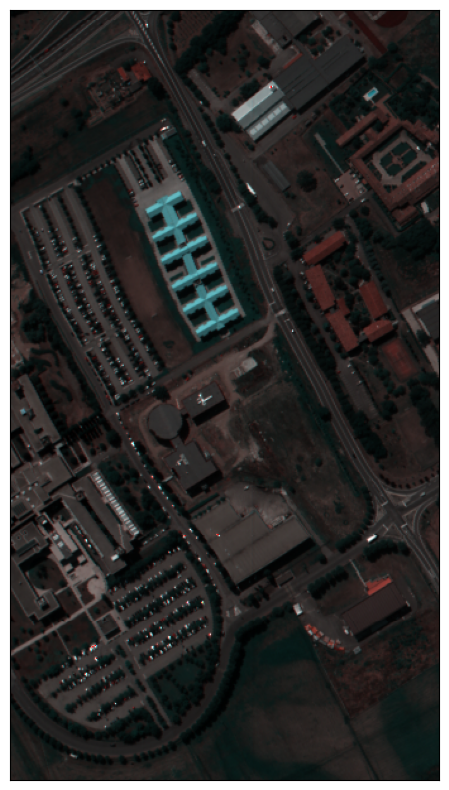

In [5]:
mdata = np.moveaxis(data, -1, 0)

ep.plot_rgb(mdata, (60, 30, 27), figsize=(12, 10))

plt.show()

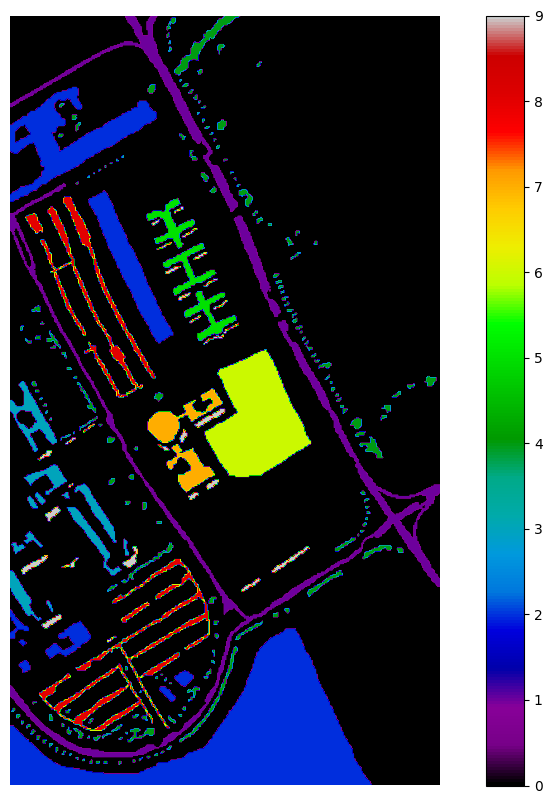

In [6]:
def plot_data(data):
  fig = plt.figure(figsize=(12, 10))
  plt.imshow(data, cmap='nipy_spectral')
  plt.colorbar()
  plt.axis('off')
  plt.show()

plot_data(gt)

In [7]:
X = df[df['class']!=0].iloc[:, :-1].values

y = tf.keras.utils.to_categorical(df[df['class']!=0].iloc[:, -1].values ,
                                  num_classes= np.unique(gt).shape[0],
                                  dtype='float32')

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, stratify = y)

print(f"Train Data: {X_train.shape}\nTest Data: {X_test.shape}")

Train Data: (29943, 103)
Test Data: (12833, 103)


In [8]:
model = Sequential(name='Pavia_University')

model.add(Input(shape = X_train[0].shape, name = 'Input_Layer'))

model.add(BatchNormalization(name = 'BatchNormalization'))

model.add(Dense(units = 128, activation= 'relu', name = 'Layer1'))
model.add(Dense(units = 128, activation= 'relu', name = 'Layer2'))
model.add(Dense(units = 128, activation= 'relu', name = 'Layer3'))
model.add(Dense(units = 128, activation= 'relu', name = 'Layer4'))

model.add(Dropout(rate = 0.2, name = 'Dropout1',))

model.add(Dense(units = 64, activation= 'relu', name = 'Layer5'))
model.add(Dense(units = 64, activation= 'relu', name = 'Layer6'))
model.add(Dense(units = 64, activation= 'relu', name = 'Layer7'))
model.add(Dense(units = 64, activation= 'relu', name = 'Layer8'))

model.add(Dropout(rate = 0.2, name = 'Dropout2'))

model.add(Dense(units = 32, activation= 'relu', name = 'Layer9'))
model.add(Dense(units = 32, activation= 'relu', name = 'Layer10'))
model.add(Dense(units = 32, activation= 'relu', name = 'Layer11'))
model.add(Dense(units = 32, activation= 'relu', name = 'Layer12'))

model.add(Dense(units = y_train.shape[1], activation= 'softmax', name = 'Output_Layer'))

model.summary()

Model: "Pavia_University"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 BatchNormalization (BatchNo  (None, 103)              412       
 rmalization)                                                    
                                                                 
 Layer1 (Dense)              (None, 128)               13312     
                                                                 
 Layer2 (Dense)              (None, 128)               16512     
                                                                 
 Layer3 (Dense)              (None, 128)               16512     
                                                                 
 Layer4 (Dense)              (None, 128)               16512     
                                                                 
 Dropout1 (Dropout)          (None, 128)               0         
                                                  

In [9]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Callbacks
es = EarlyStopping(monitor = 'val_loss',
                   min_delta = 0,
                   patience = 15,
                   verbose = 1,
                   restore_best_weights = True)

checkpoint = ModelCheckpoint(filepath = 'Pavia_University_Model.h5',
                             monitor = 'val_loss',
                             mode ='min',
                             save_best_only = True,
                             verbose = 1)
# Fit
history = model.fit(x = X_train,
          y = y_train,
          validation_data = (X_test, y_test),
          epochs = 100,
          callbacks = [es, checkpoint])

Epoch 1/100
930/936 [============================>.] - ETA: 0s - loss: 0.8242 - accuracy: 0.6987
Epoch 1: val_loss improved from inf to 0.47837, saving model to Pavia_University_Model.h5
936/936 [==============================] - 10s 6ms/step - loss: 0.8227 - accuracy: 0.6992 - val_loss: 0.4784 - val_accuracy: 0.8033
Epoch 2/100
930/936 [============================>.] - ETA: 0s - loss: 0.5792 - accuracy: 0.7805
Epoch 2: val_loss improved from 0.47837 to 0.42879, saving model to Pavia_University_Model.h5
936/936 [==============================] - 6s 7ms/step - loss: 0.5790 - accuracy: 0.7805 - val_loss: 0.4288 - val_accuracy: 0.8190
Epoch 3/100
935/936 [============================>.] - ETA: 0s - loss: 0.5149 - accuracy: 0.8075
Epoch 3: val_loss improved from 0.42879 to 0.36662, saving model to Pavia_University_Model.h5
936/936 [==============================] - 5s 5ms/step - loss: 0.5148 - accuracy: 0.8076 - val_loss: 0.3666 - val_accuracy: 0.8538
Epoch 4/100
935/936 [================

In [10]:
hist = pd.DataFrame(data= history.history)

fig = go.Figure()

fig.add_trace(go.Scatter(x = hist.index, y = hist.loss.values,
                    mode='lines+markers',
                    name='Train Loss'))

fig.add_trace(go.Scatter(x = hist.index, y = hist.accuracy.values,
                    mode='lines+markers',
                    name='Train Accuracy'))

fig.add_trace(go.Scatter(x = hist.index, y = hist.val_loss.values,
                    mode='lines+markers', name='Test loss'))

fig.add_trace(go.Scatter(x = hist.index, y = hist.val_accuracy.values,
                    mode='lines+markers', name='Test Accuracy'))

fig.show()

In [11]:
pred = np.argmax(model.predict(X_test), axis=1)

# Classification Report
print(classification_report(pred, np.argmax(y_test, 1),
      target_names = ['1. Asphalt', '2. Meadows', '3. Gravel', '4. Trees',
                 '5. Painted metal sheets','6. Bare Soil', '7. Bitumen',
                 '8. Self-Blocking Bricks', '9. Shadows']))

402/402 [==============================] - 1s 3ms/step
                         precision    recall  f1-score   support

             1. Asphalt       0.94      0.97      0.95      1930
             2. Meadows       0.99      0.98      0.98      5648
              3. Gravel       0.58      0.92      0.71       396
               4. Trees       0.98      0.94      0.96       956
5. Painted metal sheets       1.00      1.00      1.00       403
           6. Bare Soil       0.93      0.97      0.95      1438
             7. Bitumen       0.85      0.89      0.87       382
8. Self-Blocking Bricks       0.96      0.76      0.85      1395
             9. Shadows       1.00      1.00      1.00       285

               accuracy                           0.94     12833
              macro avg       0.91      0.94      0.92     12833
           weighted avg       0.95      0.94      0.95     12833



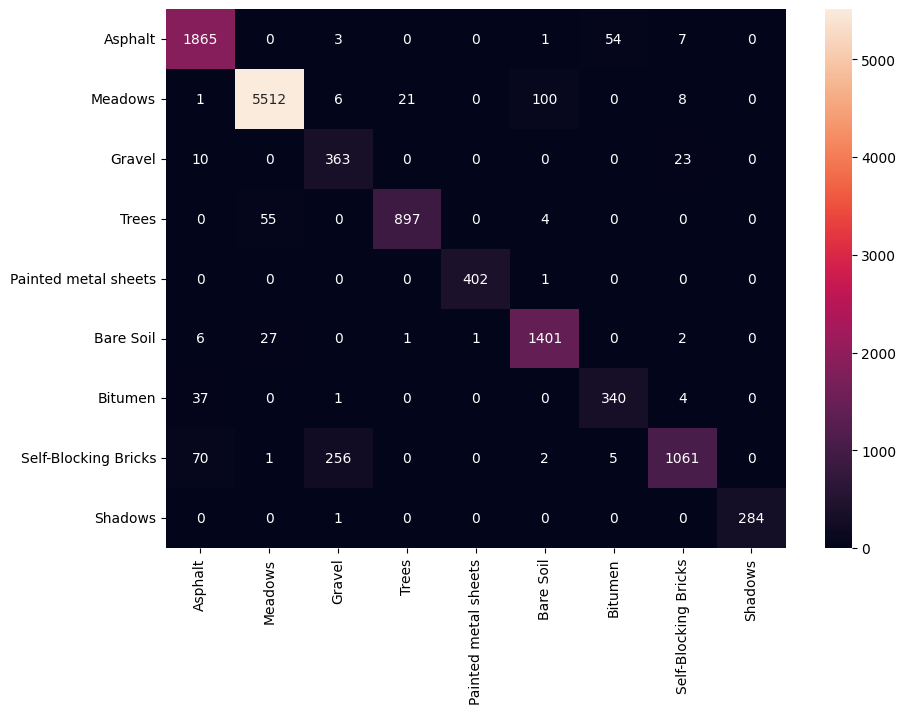

In [12]:
plt.figure(figsize = (10,7))

classes = ['Asphalt', 'Meadows', 'Gravel', 'Trees', 'Painted metal sheets',
            'Bare Soil', 'Bitumen', 'Self-Blocking Bricks', 'Shadows']

mat = confusion_matrix(np.add(pred, 1), np.add(np.argmax(y_test, 1), 1))

df_cm = pd.DataFrame(mat, index = classes, columns = classes)

sns.heatmap(df_cm, annot=True, fmt='d')

plt.show()

In [ ]:
l = []

for i in tqdm(range(df.shape[0])):
  if df.iloc[i, -1] == 0:
    l.append(0)
  else:
    l.append(np.argmax(model.predict(df.iloc[i, :-1].values.reshape(-1, 103)), 1))

q = np.array(l).reshape(gt.shape).astype('float')

plot_data(q)

  0%|          | 0/207400 [00:00<?, ?it/s]

1/1 [==============================] - 0s 35ms/step


  0%|          | 92/207400 [00:00<05:49, 593.78it/s]

1/1 [==============================] - 0s 35ms/step


  0%|          | 152/207400 [00:01<49:55, 69.18it/s]

1/1 [==============================] - 0s 63ms/step


  0%|          | 179/207400 [00:03<1:26:54, 39.74it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 195/207400 [00:03<1:20:38, 42.83it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 433/207400 [00:03<19:26, 177.48it/s] 

1/1 [==============================] - 0s 24ms/step


  0%|          | 497/207400 [00:04<25:27, 135.43it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 542/207400 [00:05<33:47, 102.00it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 774/207400 [00:05<15:27, 222.86it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 845/207400 [00:06<23:03, 149.31it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 896/207400 [00:07<28:00, 122.89it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 1114/207400 [00:07<14:51, 231.37it/s]

1/1 [==============================] - 0s 36ms/step


  1%|          | 1185/207400 [00:09<24:24, 140.82it/s]

1/1 [==============================] - 0s 38ms/step


  1%|          | 1236/207400 [00:10<34:23, 99.89it/s] 

1/1 [==============================] - 0s 44ms/step


  1%|          | 1454/207400 [00:10<18:12, 188.58it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 1528/207400 [00:12<31:06, 110.27it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 1581/207400 [00:12<32:58, 104.04it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 1795/207400 [00:13<18:06, 189.24it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 1861/207400 [00:14<27:06, 126.36it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 1909/207400 [00:15<32:33, 105.20it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 2136/207400 [00:15<17:04, 200.31it/s]

1/1 [==============================] - 0s 32ms/step


  1%|          | 2203/207400 [00:16<24:58, 136.98it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 2252/207400 [00:17<30:40, 111.48it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 2477/207400 [00:17<16:24, 208.17it/s]

1/1 [==============================] - 0s 31ms/step


  1%|          | 2542/207400 [00:18<22:50, 149.48it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 2590/207400 [00:19<28:35, 119.39it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▏         | 2818/207400 [00:19<15:20, 222.28it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 2881/207400 [00:20<21:37, 157.63it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▏         | 2927/207400 [00:21<26:29, 128.62it/s]

1/1 [==============================] - 0s 37ms/step


  2%|▏         | 3158/207400 [00:21<13:41, 248.55it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▏         | 3240/207400 [00:23<31:08, 109.29it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 3499/207400 [00:24<17:07, 198.47it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 3586/207400 [00:25<25:16, 134.44it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 3840/207400 [00:25<15:03, 225.28it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 3932/207400 [00:27<22:05, 153.50it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 4180/207400 [00:27<13:51, 244.40it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 4270/207400 [00:28<20:25, 165.81it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 4520/207400 [00:28<12:52, 262.56it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 4611/207400 [00:30<19:44, 171.22it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 4861/207400 [00:30<12:40, 266.42it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 4948/207400 [00:31<19:46, 170.57it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 5201/207400 [00:32<12:32, 268.83it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 5290/207400 [00:33<20:39, 163.09it/s]

1/1 [==============================] - 0s 39ms/step


  3%|▎         | 5541/207400 [00:33<12:56, 259.80it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 5640/207400 [00:36<26:56, 124.85it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 5883/207400 [00:36<17:08, 195.97it/s]

1/1 [==============================] - 0s 32ms/step


  3%|▎         | 5977/207400 [00:38<23:54, 140.44it/s]

1/1 [==============================] - 0s 29ms/step


  3%|▎         | 6222/207400 [00:38<14:53, 225.22it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 6339/207400 [00:39<21:52, 153.16it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 6564/207400 [00:40<14:39, 228.46it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 6664/207400 [00:41<19:58, 167.49it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 6904/207400 [00:41<12:59, 257.09it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 6997/207400 [00:42<19:12, 173.95it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 7232/207400 [00:42<12:31, 266.22it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▎         | 7323/207400 [00:44<23:11, 143.84it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 7569/207400 [00:45<14:41, 226.65it/s]

1/1 [==============================] - 0s 45ms/step


  4%|▎         | 7656/207400 [00:48<35:56, 92.62it/s] 

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 7906/207400 [00:48<21:39, 153.49it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 8022/207400 [00:52<38:42, 85.84it/s] 

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 8244/207400 [00:52<25:17, 131.22it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 8341/207400 [00:55<39:18, 84.38it/s] 

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 8581/207400 [00:55<24:35, 134.79it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 8670/207400 [00:58<37:10, 89.10it/s] 

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 8919/207400 [00:58<22:46, 145.25it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 9009/207400 [01:01<38:53, 85.00it/s] 

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 9257/207400 [01:01<23:50, 138.53it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 9351/207400 [01:03<33:34, 98.29it/s] 

1/1 [==============================] - 0s 25ms/step


  5%|▍         | 9595/207400 [01:04<20:58, 157.12it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 9686/207400 [01:06<30:14, 108.98it/s]

1/1 [==============================] - 0s 29ms/step


  5%|▍         | 9933/207400 [01:06<18:55, 173.88it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▍         | 10019/207400 [01:08<30:53, 106.49it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▍         | 10270/207400 [01:08<19:05, 172.04it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▍         | 10356/207400 [01:10<28:36, 114.78it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▌         | 10608/207400 [01:11<17:46, 184.45it/s]

1/1 [==============================] - 0s 55ms/step


  5%|▌         | 10692/207400 [01:13<31:14, 104.93it/s]

1/1 [==============================] - 0s 51ms/step


  5%|▌         | 10946/207400 [01:13<19:02, 171.97it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▌         | 11040/207400 [01:15<29:03, 112.59it/s]

1/1 [==============================] - 0s 28ms/step


  5%|▌         | 11286/207400 [01:16<18:21, 177.98it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 11372/207400 [01:17<27:23, 119.28it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 11624/207400 [01:18<17:06, 190.78it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 11707/207400 [01:19<25:44, 126.73it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 11767/207400 [01:20<23:12, 140.52it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 11962/207400 [01:20<15:09, 214.96it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 12031/207400 [01:21<20:32, 158.56it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 12082/207400 [01:22<25:05, 129.78it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 12300/207400 [01:22<14:08, 229.84it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 12369/207400 [01:23<19:46, 164.39it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 12419/207400 [01:23<22:21, 145.36it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 12637/207400 [01:23<12:19, 263.47it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 12713/207400 [01:25<22:49, 142.13it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 12768/207400 [01:26<25:43, 126.10it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 12809/207400 [01:26<24:07, 134.42it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▋         | 12977/207400 [01:26<14:18, 226.34it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▋         | 13031/207400 [01:26<14:21, 225.57it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▋         | 13075/207400 [01:27<24:59, 129.61it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▋         | 13118/207400 [01:27<22:17, 145.29it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▋         | 13314/207400 [01:28<10:49, 298.87it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▋         | 13392/207400 [01:28<17:55, 180.38it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▋         | 13449/207400 [01:29<20:29, 157.74it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 13492/207400 [01:29<19:57, 161.98it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 13653/207400 [01:29<11:46, 274.29it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 13709/207400 [01:30<13:20, 242.02it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 13753/207400 [01:31<28:55, 111.57it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 13797/207400 [01:31<25:18, 127.50it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 13991/207400 [01:31<12:33, 256.56it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 14049/207400 [01:32<13:30, 238.59it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 14095/207400 [01:33<28:48, 111.85it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 14330/207400 [01:33<13:44, 234.28it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 14396/207400 [01:34<13:21, 240.90it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 14450/207400 [01:35<26:12, 122.72it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 14668/207400 [01:35<14:09, 226.83it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 14735/207400 [01:36<14:37, 219.68it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 14788/207400 [01:38<34:24, 93.28it/s] 

1/1 [==============================] - 0s 54ms/step


  7%|▋         | 15005/207400 [01:38<18:26, 173.90it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 15071/207400 [01:38<19:59, 160.40it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 15121/207400 [01:40<34:09, 93.82it/s] 

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 15344/207400 [01:40<17:32, 182.51it/s]

1/1 [==============================] - 0s 31ms/step


  7%|▋         | 15435/207400 [01:42<26:00, 123.01it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 15501/207400 [01:42<23:58, 133.45it/s]

1/1 [==============================] - 0s 28ms/step


  8%|▊         | 15682/207400 [01:42<14:28, 220.83it/s]

1/1 [==============================] - 0s 85ms/step


  8%|▊         | 15771/207400 [01:43<21:34, 148.03it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 15836/207400 [01:44<25:58, 122.94it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 16022/207400 [01:44<15:43, 202.87it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 16089/207400 [01:45<14:58, 212.88it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 16144/207400 [01:45<19:56, 159.88it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 16360/207400 [01:46<11:06, 286.59it/s]

1/1 [==============================] - 0s 28ms/step


  8%|▊         | 16430/207400 [01:46<11:05, 287.07it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 16488/207400 [01:47<15:43, 202.30it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 16698/207400 [01:47<09:23, 338.32it/s]

1/1 [==============================] - 0s 27ms/step


  8%|▊         | 16764/207400 [01:47<09:55, 319.90it/s]

1/1 [==============================] - 0s 27ms/step


  8%|▊         | 16818/207400 [01:48<15:15, 208.08it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 17037/207400 [01:48<08:51, 358.46it/s]

1/1 [==============================] - 0s 28ms/step


  8%|▊         | 17104/207400 [01:48<09:23, 337.63it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 17159/207400 [01:49<16:06, 196.77it/s]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 17374/207400 [01:49<09:11, 344.36it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 17448/207400 [01:50<11:20, 279.13it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 17505/207400 [01:51<20:32, 154.13it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▊         | 17712/207400 [01:51<11:40, 270.81it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▊         | 17788/207400 [01:51<12:13, 258.36it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▊         | 17848/207400 [01:52<17:23, 181.58it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▊         | 18051/207400 [01:52<10:28, 301.11it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▊         | 18117/207400 [01:52<10:52, 290.26it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 18171/207400 [01:53<15:42, 200.75it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 18389/207400 [01:53<09:02, 348.21it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 18457/207400 [01:54<10:14, 307.49it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 18510/207400 [01:54<17:59, 175.06it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▉         | 18728/207400 [01:55<10:14, 307.24it/s]

1/1 [==============================] - 0s 27ms/step


  9%|▉         | 18794/207400 [01:55<10:44, 292.60it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▉         | 18848/207400 [01:56<21:50, 143.83it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▉         | 19065/207400 [01:56<11:47, 266.29it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 19151/207400 [01:57<12:33, 249.84it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 19218/207400 [01:58<23:24, 134.01it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 19405/207400 [01:58<14:18, 219.01it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▉         | 19474/207400 [01:59<16:53, 185.49it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 19526/207400 [02:00<24:50, 126.05it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 19743/207400 [02:00<13:33, 230.65it/s]

1/1 [==============================] - 0s 35ms/step


 10%|▉         | 19810/207400 [02:01<19:59, 156.38it/s]

1/1 [==============================] - 0s 38ms/step


 10%|▉         | 19859/207400 [02:03<33:41, 92.78it/s] 

1/1 [==============================] - 0s 39ms/step


 10%|▉         | 20080/207400 [02:03<17:32, 177.95it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 20156/207400 [02:04<23:38, 131.96it/s]

1/1 [==============================] - 0s 25ms/step


 10%|▉         | 20211/207400 [02:06<32:29, 96.00it/s] 

1/1 [==============================] - 0s 35ms/step


 10%|▉         | 20419/207400 [02:06<18:09, 171.69it/s]

1/1 [==============================] - 0s 24ms/step


 10%|▉         | 20483/207400 [02:07<25:59, 119.85it/s]

1/1 [==============================] - 0s 29ms/step


 10%|▉         | 20529/207400 [02:08<28:43, 108.40it/s]

1/1 [==============================] - 0s 24ms/step


 10%|▉         | 20564/207400 [02:08<31:48, 97.88it/s] 

1/1 [==============================] - 0s 23ms/step


 10%|█         | 20758/207400 [02:08<16:25, 189.43it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 20811/207400 [02:10<30:16, 102.72it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 20852/207400 [02:10<27:12, 114.24it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 20887/207400 [02:11<36:54, 84.23it/s] 

1/1 [==============================] - 0s 22ms/step


 10%|█         | 21096/207400 [02:11<16:49, 184.55it/s]

1/1 [==============================] - 0s 25ms/step


 10%|█         | 21154/207400 [02:13<31:37, 98.14it/s] 

1/1 [==============================] - 0s 24ms/step


 10%|█         | 21209/207400 [02:13<27:16, 113.79it/s]

1/1 [==============================] - 0s 42ms/step


 10%|█         | 21247/207400 [02:14<32:00, 96.95it/s] 

1/1 [==============================] - 0s 34ms/step


 10%|█         | 21433/207400 [02:14<15:57, 194.31it/s]

1/1 [==============================] - 0s 26ms/step


 10%|█         | 21496/207400 [02:17<38:45, 79.95it/s] 

1/1 [==============================] - 0s 27ms/step


 10%|█         | 21550/207400 [02:17<33:01, 93.78it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 21590/207400 [02:17<34:06, 90.81it/s]

1/1 [==============================] - 0s 25ms/step


 10%|█         | 21772/207400 [02:18<17:24, 177.79it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 21827/207400 [02:20<34:41, 89.14it/s] 

1/1 [==============================] - 0s 31ms/step


 11%|█         | 21890/207400 [02:20<28:31, 108.42it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 21929/207400 [02:20<32:32, 94.99it/s] 

1/1 [==============================] - 0s 24ms/step


 11%|█         | 22109/207400 [02:20<16:12, 190.61it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 22181/207400 [02:23<33:51, 91.19it/s] 

1/1 [==============================] - 0s 27ms/step


 11%|█         | 22232/207400 [02:23<30:27, 101.31it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 22274/207400 [02:23<32:54, 93.75it/s] 

1/1 [==============================] - 0s 24ms/step


 11%|█         | 22449/207400 [02:24<17:21, 177.54it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 22501/207400 [02:26<37:37, 81.90it/s] 

1/1 [==============================] - 0s 27ms/step


 11%|█         | 22571/207400 [02:26<29:48, 103.34it/s]

1/1 [==============================] - 0s 36ms/step


 11%|█         | 22610/207400 [02:27<37:14, 82.69it/s] 

1/1 [==============================] - 0s 36ms/step


 11%|█         | 22786/207400 [02:27<18:46, 163.81it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 22851/207400 [02:29<39:10, 78.53it/s] 

1/1 [==============================] - 0s 25ms/step


 11%|█         | 22911/207400 [02:30<32:37, 94.25it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 22953/207400 [02:30<33:15, 92.41it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 23125/207400 [02:30<17:40, 173.74it/s]

1/1 [==============================] - 0s 29ms/step


 11%|█         | 23178/207400 [02:32<31:24, 97.76it/s] 

1/1 [==============================] - 0s 26ms/step


 11%|█         | 23224/207400 [02:32<27:46, 110.54it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 23259/207400 [02:33<37:26, 81.97it/s] 

1/1 [==============================] - 0s 25ms/step


 11%|█         | 23284/207400 [02:33<35:10, 87.25it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█▏        | 23464/207400 [02:33<15:48, 193.99it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█▏        | 23510/207400 [02:34<25:33, 119.91it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█▏        | 23544/207400 [02:35<28:40, 106.88it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█▏        | 23570/207400 [02:36<35:49, 85.51it/s] 

1/1 [==============================] - 0s 26ms/step


 11%|█▏        | 23592/207400 [02:36<34:29, 88.81it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█▏        | 23609/207400 [02:36<44:17, 69.15it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█▏        | 23801/207400 [02:37<15:06, 202.49it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█▏        | 23846/207400 [02:38<29:53, 102.37it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 23879/207400 [02:38<33:20, 91.73it/s] 

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 23904/207400 [02:39<33:05, 92.44it/s]

1/1 [==============================] - 0s 31ms/step


 12%|█▏        | 23924/207400 [02:39<43:30, 70.28it/s]

1/1 [==============================] - 0s 32ms/step


 12%|█▏        | 23939/207400 [02:40<1:02:27, 48.96it/s]

1/1 [==============================] - 0s 42ms/step


 12%|█▏        | 24141/207400 [02:40<18:34, 164.41it/s] 

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 24196/207400 [02:42<40:06, 76.13it/s] 

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 24242/207400 [02:43<33:59, 89.80it/s]

1/1 [==============================] - 0s 32ms/step


 12%|█▏        | 24278/207400 [02:45<57:29, 53.08it/s]

1/1 [==============================] - 0s 34ms/step


 12%|█▏        | 24304/207400 [02:45<51:48, 58.90it/s]

1/1 [==============================] - 0s 36ms/step


 12%|█▏        | 24481/207400 [02:45<21:11, 143.82it/s]

1/1 [==============================] - 0s 38ms/step


 12%|█▏        | 24545/207400 [02:47<39:04, 77.98it/s] 

1/1 [==============================] - 0s 39ms/step


 12%|█▏        | 24591/207400 [02:48<43:28, 70.07it/s]

1/1 [==============================] - 0s 34ms/step


 12%|█▏        | 24625/207400 [02:49<49:37, 61.39it/s]

1/1 [==============================] - 0s 33ms/step


 12%|█▏        | 24650/207400 [02:49<45:54, 66.36it/s]

1/1 [==============================] - 0s 34ms/step


 12%|█▏        | 24843/207400 [02:49<18:05, 168.22it/s]

1/1 [==============================] - 0s 33ms/step


 12%|█▏        | 24911/207400 [02:51<32:18, 94.12it/s] 

1/1 [==============================] - 0s 54ms/step


 12%|█▏        | 24960/207400 [02:53<57:40, 52.72it/s]

1/1 [==============================] - 0s 53ms/step


 12%|█▏        | 24995/207400 [02:54<56:54, 53.42it/s]

1/1 [==============================] - 0s 59ms/step


 12%|█▏        | 25182/207400 [02:54<26:20, 115.26it/s]

1/1 [==============================] - 0s 34ms/step


 12%|█▏        | 25235/207400 [02:56<39:19, 77.21it/s] 

1/1 [==============================] - 0s 31ms/step


 12%|█▏        | 25274/207400 [02:57<50:59, 59.53it/s]

1/1 [==============================] - 0s 40ms/step


 12%|█▏        | 25302/207400 [02:58<1:04:46, 46.86it/s]

1/1 [==============================] - 0s 28ms/step


 12%|█▏        | 25521/207400 [02:59<25:46, 117.59it/s] 

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 25597/207400 [03:00<32:18, 93.78it/s] 

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 25652/207400 [03:02<47:48, 63.35it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 25858/207400 [03:02<24:41, 122.51it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 25921/207400 [03:04<34:06, 88.69it/s] 

1/1 [==============================] - 0s 32ms/step


 13%|█▎        | 25967/207400 [03:06<53:32, 56.47it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 26000/207400 [03:07<57:13, 52.83it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 26196/207400 [03:07<26:54, 112.24it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 26271/207400 [03:09<37:38, 80.19it/s] 

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 26325/207400 [03:12<59:03, 51.10it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 26364/207400 [03:12<51:42, 58.36it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 26536/207400 [03:12<27:01, 111.56it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 26587/207400 [03:14<42:10, 71.46it/s] 

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 26624/207400 [03:15<51:14, 58.80it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 26651/207400 [03:16<59:32, 50.59it/s]

1/1 [==============================] - 0s 37ms/step


 13%|█▎        | 26671/207400 [03:17<1:07:04, 44.91it/s]

1/1 [==============================] - 0s 38ms/step


 13%|█▎        | 26875/207400 [03:17<24:42, 121.78it/s] 

1/1 [==============================] - 0s 28ms/step


 13%|█▎        | 26928/207400 [03:20<54:10, 55.51it/s] 

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 26966/207400 [03:22<1:04:46, 46.42it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 26993/207400 [03:22<1:09:03, 43.54it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 27013/207400 [03:23<1:13:10, 41.08it/s]

1/1 [==============================] - 0s 31ms/step


 13%|█▎        | 27211/207400 [03:23<26:25, 113.68it/s] 

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 27281/207400 [03:26<47:38, 63.00it/s] 

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 27331/207400 [03:28<1:08:22, 43.89it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 27367/207400 [03:29<1:06:15, 45.28it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 27551/207400 [03:29<30:58, 96.78it/s]  

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 27601/207400 [03:33<1:04:37, 46.37it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 27636/207400 [03:34<1:07:51, 44.16it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 27662/207400 [03:36<1:24:37, 35.40it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 27681/207400 [03:36<1:22:17, 36.40it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 27696/207400 [03:36<1:18:07, 38.34it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 27890/207400 [03:36<25:27, 117.50it/s] 

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 27934/207400 [03:39<58:12, 51.38it/s] 

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 27965/207400 [03:40<51:52, 57.66it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 27992/207400 [03:42<1:23:45, 35.70it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 28011/207400 [03:42<1:17:55, 38.37it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▎        | 28027/207400 [03:43<1:29:55, 33.25it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█▎        | 28039/207400 [03:43<1:25:40, 34.89it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█▎        | 28227/207400 [03:43<22:55, 130.26it/s] 

1/1 [==============================] - 0s 24ms/step


 14%|█▎        | 28277/207400 [03:47<1:06:00, 45.23it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 28313/207400 [03:48<1:10:26, 42.37it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▎        | 28339/207400 [03:50<1:31:16, 32.70it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▎        | 28359/207400 [03:50<1:21:08, 36.78it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▎        | 28376/207400 [03:51<1:26:53, 34.34it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▎        | 28389/207400 [03:51<1:20:10, 37.22it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 28566/207400 [03:51<23:15, 128.11it/s] 

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 28604/207400 [03:54<1:04:30, 46.20it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 28640/207400 [03:54<54:35, 54.58it/s]  

1/1 [==============================] - 0s 37ms/step


 14%|█▍        | 28665/207400 [03:57<1:35:07, 31.32it/s]

1/1 [==============================] - 0s 36ms/step


 14%|█▍        | 28683/207400 [03:58<1:42:10, 29.15it/s]

1/1 [==============================] - 0s 48ms/step


 14%|█▍        | 28699/207400 [03:58<1:30:19, 32.97it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 28712/207400 [03:58<1:37:47, 30.45it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 28727/207400 [03:59<1:24:39, 35.18it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 28737/207400 [03:59<1:27:25, 34.06it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 28905/207400 [03:59<20:33, 144.71it/s] 

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 28938/207400 [04:02<1:01:17, 48.53it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 28962/207400 [04:02<1:04:54, 45.82it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 28980/207400 [04:03<1:01:51, 48.08it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 28995/207400 [04:04<1:28:40, 33.53it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█▍        | 29006/207400 [04:05<1:51:05, 26.76it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 29014/207400 [04:05<1:57:05, 25.39it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 29040/207400 [04:06<1:21:41, 36.39it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 29049/207400 [04:06<1:37:51, 30.38it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 29066/207400 [04:06<1:17:40, 38.27it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█▍        | 29074/207400 [04:07<1:30:58, 32.67it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 29244/207400 [04:07<17:53, 165.95it/s] 

1/1 [==============================] - 0s 37ms/step


 14%|█▍        | 29277/207400 [04:10<1:13:56, 40.15it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 29300/207400 [04:11<1:20:59, 36.65it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 29317/207400 [04:11<1:13:22, 40.45it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 29332/207400 [04:13<1:39:33, 29.81it/s]

1/1 [==============================] - 0s 30ms/step


 14%|█▍        | 29343/207400 [04:14<2:01:15, 24.47it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█▍        | 29351/207400 [04:14<2:07:23, 23.29it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 29381/207400 [04:14<1:22:51, 35.81it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 29391/207400 [04:15<1:33:00, 31.90it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 29405/207400 [04:15<1:15:36, 39.24it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█▍        | 29415/207400 [04:15<1:30:40, 32.71it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 29582/207400 [04:16<18:30, 160.17it/s] 

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 29615/207400 [04:18<1:00:21, 49.09it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 29638/207400 [04:19<1:09:55, 42.37it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 29656/207400 [04:19<1:03:39, 46.54it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 29671/207400 [04:21<1:31:07, 32.51it/s]

1/1 [==============================] - 0s 36ms/step


 14%|█▍        | 29682/207400 [04:22<2:06:54, 23.34it/s]

1/1 [==============================] - 0s 38ms/step


 14%|█▍        | 29690/207400 [04:22<2:12:35, 22.34it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▍        | 29720/207400 [04:22<1:24:24, 35.09it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█▍        | 29732/207400 [04:23<1:53:34, 26.07it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 29746/207400 [04:24<1:34:29, 31.33it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 29755/207400 [04:24<1:43:13, 28.68it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 29922/207400 [04:24<20:27, 144.62it/s] 

1/1 [==============================] - 0s 34ms/step


 14%|█▍        | 29957/207400 [04:28<1:14:12, 39.85it/s]

1/1 [==============================] - 0s 36ms/step


 14%|█▍        | 29982/207400 [04:28<1:08:06, 43.41it/s]

1/1 [==============================] - 0s 36ms/step


 14%|█▍        | 30002/207400 [04:29<1:18:57, 37.45it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█▍        | 30017/207400 [04:30<1:51:35, 26.49it/s]

1/1 [==============================] - 0s 36ms/step


 14%|█▍        | 30028/207400 [04:31<2:10:25, 22.67it/s]

1/1 [==============================] - 0s 36ms/step


 14%|█▍        | 30061/207400 [04:32<1:27:37, 33.73it/s]

1/1 [==============================] - 0s 37ms/step


 15%|█▍        | 30074/207400 [04:32<1:43:23, 28.59it/s]

1/1 [==============================] - 0s 38ms/step


 15%|█▍        | 30083/207400 [04:33<1:45:17, 28.07it/s]

1/1 [==============================] - 0s 43ms/step


 15%|█▍        | 30091/207400 [04:33<2:08:22, 23.02it/s]

1/1 [==============================] - 0s 58ms/step


 15%|█▍        | 30261/207400 [04:34<25:05, 117.68it/s] 

1/1 [==============================] - 0s 56ms/step


 15%|█▍        | 30294/207400 [04:39<1:49:08, 27.05it/s]

1/1 [==============================] - 0s 49ms/step


 15%|█▍        | 30317/207400 [04:40<1:47:31, 27.45it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▍        | 30334/207400 [04:40<1:39:49, 29.56it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▍        | 30348/207400 [04:41<2:05:32, 23.50it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█▍        | 30358/207400 [04:42<2:23:06, 20.62it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 30366/207400 [04:43<2:30:29, 19.61it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 30403/207400 [04:43<1:28:09, 33.46it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▍        | 30414/207400 [04:43<1:36:23, 30.60it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 30422/207400 [04:44<1:36:26, 30.58it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█▍        | 30429/207400 [04:44<1:48:43, 27.13it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 30601/207400 [04:44<18:33, 158.81it/s] 

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 30655/207400 [04:47<52:51, 55.72it/s] 

1/1 [==============================] - 0s 38ms/step


 15%|█▍        | 30694/207400 [04:50<1:27:44, 33.56it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▍        | 30722/207400 [04:51<1:30:52, 32.40it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 30743/207400 [04:51<1:19:45, 36.92it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 30761/207400 [04:51<1:19:53, 36.85it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▍        | 30775/207400 [04:52<1:21:45, 36.01it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 30941/207400 [04:52<23:38, 124.44it/s] 

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 30996/207400 [04:54<49:20, 59.59it/s] 

1/1 [==============================] - 0s 24ms/step


 15%|█▍        | 31035/207400 [04:57<1:16:41, 38.33it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▍        | 31063/207400 [04:57<1:14:20, 39.54it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 31084/207400 [04:57<1:08:19, 43.01it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 31101/207400 [04:58<1:11:16, 41.23it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 31282/207400 [04:58<23:12, 126.50it/s] 

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 31324/207400 [05:00<44:02, 66.64it/s] 

1/1 [==============================] - 0s 34ms/step


 15%|█▌        | 31354/207400 [05:01<52:56, 55.42it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 31376/207400 [05:03<1:32:00, 31.89it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 31392/207400 [05:04<1:26:22, 33.96it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 31424/207400 [05:04<1:06:49, 43.89it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▌        | 31439/207400 [05:04<1:14:40, 39.27it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 31621/207400 [05:05<21:31, 136.08it/s] 

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 31683/207400 [05:06<37:39, 77.78it/s] 

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 31728/207400 [05:09<1:10:44, 41.39it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 31764/207400 [05:09<59:34, 49.13it/s]  

1/1 [==============================] - 0s 26ms/step


 15%|█▌        | 31793/207400 [05:10<1:03:15, 46.26it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█▌        | 31962/207400 [05:10<26:50, 108.95it/s] 

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 32005/207400 [05:12<46:20, 63.09it/s] 

1/1 [==============================] - 0s 35ms/step


 15%|█▌        | 32036/207400 [05:14<1:02:18, 46.91it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 32059/207400 [05:16<1:33:28, 31.26it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 32096/207400 [05:16<1:13:38, 39.68it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 32114/207400 [05:17<1:20:36, 36.24it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 32128/207400 [05:17<1:14:19, 39.30it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 32302/207400 [05:17<23:28, 124.28it/s] 

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 32340/207400 [05:19<47:11, 61.82it/s] 

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 32367/207400 [05:20<54:02, 53.99it/s]

1/1 [==============================] - 0s 23ms/step
